# Phase 2 : Test de généralisation sur Bordeaux

### Objectif

Tester la robustesse et la capacité de généralisation des modèles construits sur **Lille**, en les appliquant à une autre ville : **Bordeaux**, pour les **logements de 4 pièces**, vendus en **2022**.

Deux cas seront analysés séparément :

- **Appartements uniquement**
- **Maisons uniquement**

### Consignes

1. **Charger les données de Bordeaux** depuis le fichier `data/bordeaux_2022.csv`.

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns

data_bordeaux = pd.read_csv("../data/bordeaux_2022.csv")

# Afficher les 5 premières lignes
print("Aperçu des 5 premières lignes :")
print(data_bordeaux.head())

# Afficher les informations sur le DataFrame
print("\nInformations sur le DataFrame :")
print(data_bordeaux.info())

# Afficher les dimensions du DataFrame
print("\nDimensions du DataFrame (lignes, colonnes) :")
print(data_bordeaux.shape)

Aperçu des 5 premières lignes :
   Identifiant de document  Reference document  1 Articles CGI  \
0                      NaN                 NaN             NaN   
1                      NaN                 NaN             NaN   
2                      NaN                 NaN             NaN   
3                      NaN                 NaN             NaN   
4                      NaN                 NaN             NaN   

   2 Articles CGI  3 Articles CGI  4 Articles CGI  5 Articles CGI  \
0             NaN             NaN             NaN             NaN   
1             NaN             NaN             NaN             NaN   
2             NaN             NaN             NaN             NaN   
3             NaN             NaN             NaN             NaN   
4             NaN             NaN             NaN             NaN   

   No disposition Date mutation Nature mutation  ...  Nombre de lots  \
0               1    04/01/2022           Vente  ...               0   
1           

2. **Appliquer exactement le même filtrage que pour Lille.**

Valeurs uniques du nombre de pièces :
[ 4.  1.  0.  3.  7.  2.  5.  6.  8. 10.  9. 11. 12. 15. 13.]

Nombre de biens par nombre de pièces :
Nombre pieces principales
0.0     6380
1.0     1302
2.0     1890
3.0     1734
4.0     1071
5.0      493
6.0      178
7.0       76
8.0       47
9.0       17
10.0       6
11.0       3
12.0       1
13.0       1
15.0       1
Name: count, dtype: int64

Nombre de biens de 4 pièces : 1071

Aperçu des biens de 4 pièces :
    Identifiant de document  Reference document  1 Articles CGI  \
0                       NaN                 NaN             NaN   
13                      NaN                 NaN             NaN   
23                      NaN                 NaN             NaN   
31                      NaN                 NaN             NaN   
48                      NaN                 NaN             NaN   

    2 Articles CGI  3 Articles CGI  4 Articles CGI  5 Articles CGI  \
0              NaN             NaN             NaN             NaN   
13

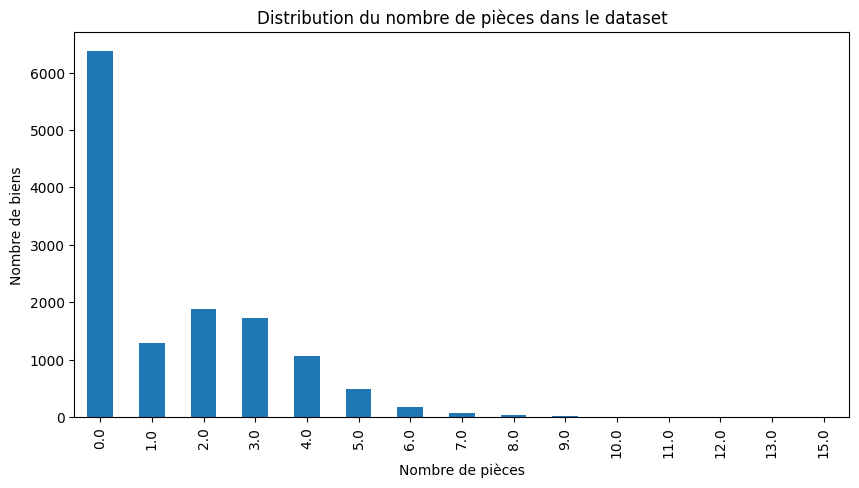

In [2]:
print("Valeurs uniques du nombre de pièces :")
print(data_bordeaux["Nombre pieces principales"].unique())
print("\nNombre de biens par nombre de pièces :")
print(data_bordeaux["Nombre pieces principales"].value_counts().sort_index())

data_4pieces = data_bordeaux[data_bordeaux["Nombre pieces principales"] == 4]

# Vérifier le résultat
print("\nNombre de biens de 4 pièces :", len(data_4pieces))
print("\nAperçu des biens de 4 pièces :")
print(data_4pieces.head())

# Visualisation de la distribution des pièces
plt.figure(figsize=(10, 5))
data_bordeaux["Nombre pieces principales"].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution du nombre de pièces dans le dataset')
plt.xlabel('Nombre de pièces')
plt.ylabel('Nombre de biens')
plt.show()

3. **Séparer les logements en deux catégories** :
    - **Appartements**
    - **Maisons**

Types de biens disponibles :
['Maison' 'Appartement']

Nombre de appartements de 4 pièces : 663

Aperçu des appartements de 4 pièces :
     Identifiant de document  Reference document  1 Articles CGI  \
13                       NaN                 NaN             NaN   
23                       NaN                 NaN             NaN   
57                       NaN                 NaN             NaN   
110                      NaN                 NaN             NaN   
136                      NaN                 NaN             NaN   

     2 Articles CGI  3 Articles CGI  4 Articles CGI  5 Articles CGI  \
13              NaN             NaN             NaN             NaN   
23              NaN             NaN             NaN             NaN   
57              NaN             NaN             NaN             NaN   
110             NaN             NaN             NaN             NaN   
136             NaN             NaN             NaN             NaN   

     No disposition Date muta

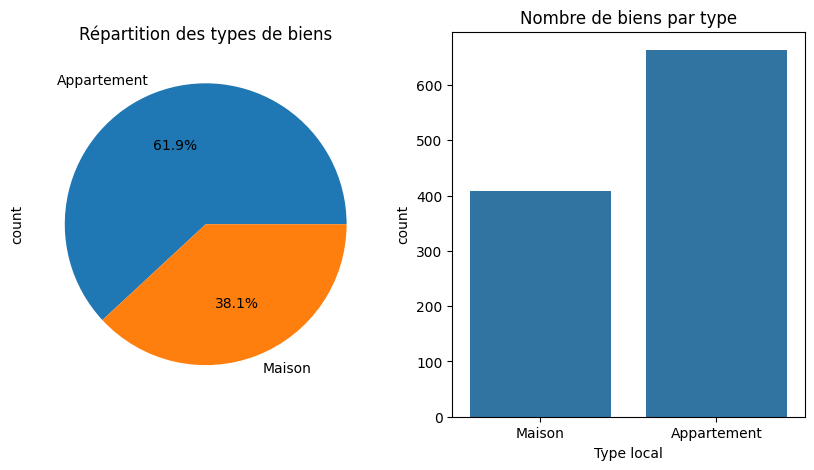

In [3]:
print("Types de biens disponibles :")
print(data_4pieces["Type local"].unique())

data_appartements_4pieces = data_4pieces[data_4pieces["Type local"] == "Appartement"]

data_maisons_4pieces = data_4pieces[data_4pieces["Type local"] == "Maison"]

# Vérifier le résultat
print("\nNombre de appartements de 4 pièces :", len(data_appartements_4pieces))
print("\nAperçu des appartements de 4 pièces :")
print(data_appartements_4pieces.head())
print("\nNombre de maisons de 4 pièces :", len(data_maisons_4pieces))
print("\nAperçu des maisons de 4 pièces :")
print(data_maisons_4pieces.head())

# Visualisation de la répartition
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
data_4pieces['Type local'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Répartition des types de biens')

plt.subplot(1, 2, 2)
sns.countplot(data=data_4pieces, x='Type local')
plt.title('Nombre de biens par type')
plt.show()

4. **Pour chaque catégorie, effectuer les mêmes préparations que dans la phase 1** :
    - Calculer `prix_m2 = Valeur fonciere / Surface reelle bati`
    - Conserver uniquement les colonnes suivantes :
        - `Surface reelle bati`
        - `Nombre pieces principales`
        - `Type local`
        - `Surface terrain`
        - `Nombre de lots`
    - Nettoyage des données (valeurs manquantes, outliers)

Index(['Surface reelle bati', 'Nombre pieces principales', 'Type local',
       'Surface terrain', 'Nombre de lots', 'Valeur fonciere'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 663 entries, 13 to 13159
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Surface reelle bati        663 non-null    float64
 1   Nombre pieces principales  663 non-null    float64
 2   Type local                 663 non-null    object 
 3   Surface terrain            61 non-null     float64
 4   Nombre de lots             663 non-null    int64  
 5   Valeur fonciere            663 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 36.3+ KB
None
Index(['Surface reelle bati', 'Nombre pieces principales', 'Type local',
       'Surface terrain', 'Nombre de lots', 'Valeur fonciere'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 408 entries, 0 to 1

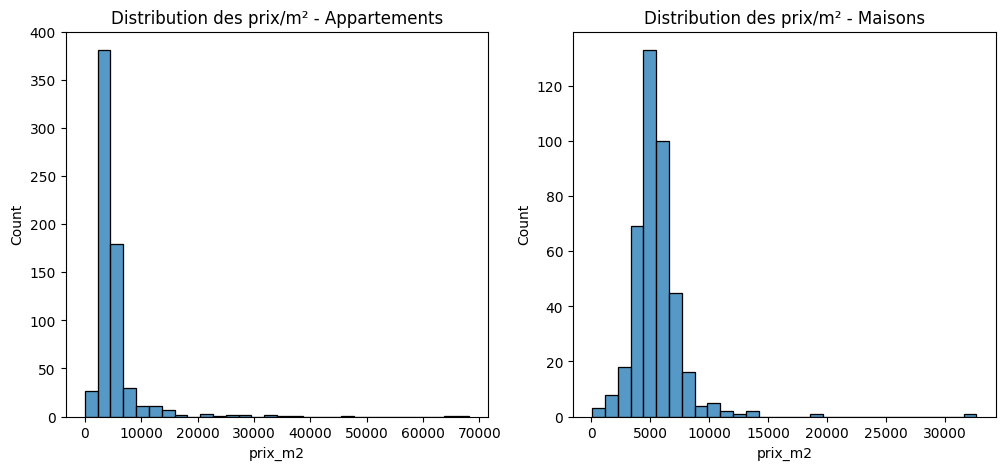

Valeurs manquantes - Appartements : 
Surface reelle bati            0
Nombre pieces principales      0
Type local                     0
Surface terrain              602
Nombre de lots                 0
Valeur fonciere                0
prix_m2                        0
dtype: int64
Valeurs manquantes - Maisons : 
Surface reelle bati           0
Nombre pieces principales     0
Type local                    0
Surface terrain              22
Nombre de lots                0
Valeur fonciere               0
prix_m2                       0
dtype: int64

Après remplacement - Valeurs manquantes Appartements :
Surface reelle bati          0
Nombre pieces principales    0
Type local                   0
Surface terrain              0
Nombre de lots               0
Valeur fonciere              0
prix_m2                      0
dtype: int64

Après remplacement - Valeurs manquantes Maisons :
Surface reelle bati          0
Nombre pieces principales    0
Type local                   0
Surface terrain     

In [5]:
# Colonnes à garder
colonnes_à_garder = [
    'Surface reelle bati',
    'Nombre pieces principales',
    'Type local',
    'Surface terrain',
    'Nombre de lots',
    'Valeur fonciere'
]

df_appartements_4pieces = data_appartements_4pieces[colonnes_à_garder].copy()
print(df_appartements_4pieces.columns)
print(df_appartements_4pieces.info())

df_maisons_4pieces = data_maisons_4pieces[colonnes_à_garder].copy()
print(df_maisons_4pieces.columns)
print(df_maisons_4pieces.info())

# Ajouter la colonne prix_m2
df_appartements_4pieces['prix_m2'] = df_appartements_4pieces['Valeur fonciere'] / df_appartements_4pieces['Surface reelle bati']
df_maisons_4pieces['prix_m2'] = df_maisons_4pieces['Valeur fonciere'] / df_maisons_4pieces['Surface reelle bati']

# Vérifier les résultats
print("Statistiques prix/m² appartements :")
print(df_appartements_4pieces['prix_m2'].describe())
print("\nStatistiques prix/m² maisons :")
print(df_maisons_4pieces['prix_m2'].describe())

# Comparaison des distributions de prix
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df_appartements_4pieces, x='prix_m2', bins=30)
plt.title('Distribution des prix/m² - Appartements')

plt.subplot(1, 2, 2)
sns.histplot(data=df_maisons_4pieces, x='prix_m2', bins=30)
plt.title('Distribution des prix/m² - Maisons')
plt.show()

# Nettoyage des données
print("Valeurs manquantes - Appartements : ")
print(df_appartements_4pieces.isnull().sum())

print("Valeurs manquantes - Maisons : ")
print(df_maisons_4pieces.isnull().sum())

df_appartements_4pieces['Surface terrain'] = df_appartements_4pieces['Surface terrain'].fillna(0)

df_maisons_4pieces['Surface terrain'] = df_maisons_4pieces['Surface terrain'].fillna(df_maisons_4pieces['Surface terrain'].median())

# Vérifier que les remplacements ont fonctionné
print("\nAprès remplacement - Valeurs manquantes Appartements :")
print(df_appartements_4pieces.isnull().sum())
print("\nAprès remplacement - Valeurs manquantes Maisons :")
print(df_maisons_4pieces.isnull().sum())

5. **Réutiliser les modèles entraînés sur Lille (phase 1)** :
    - **Ne pas réentraîner les modèles**
    - Appliquer directement les modèles (un pour les appartements, un pour les maisons)
    - Prédire les `prix_m2` sur les données de Bordeaux
    - Calculer la **MSE** pour chaque prédiction

6. **Comparer les performances entre Lille et Bordeaux pour chaque type de logement** :
    - Le modèle est-il aussi performant sur Bordeaux ?
    - Quels écarts de performance observez-vous ?
    - Quels facteurs peuvent expliquer ces différences ?
    - Le modèle généralise-t-il mieux sur un type de bien que sur l'autre ?